In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def f(x):
    return 3*x**2 - 4*x + 5

In [ ]:
f(3)

In [ ]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [ ]:
h = 0.001
x =3.0
(f(x+h) - f(x)) / h

In [ ]:
a = 2.0
b = -3.0
c = 10
d = a*b + c
print(d)

In [ ]:
h = 0.0001
d1 = a*b +c
a+= h
d2 = a*b +c
print("d1", d1)
print("d2", d2)
print("slope", (d2 - d1) / h)

In [ ]:
li = (-6, 10, 11)
prev = set(li)
prev

In [97]:
class Value:
    
    def __init__(self, data, _children=(), _op='', label =''):
        self.data = data
        self._prev = set(_children)
        self._backward = lambda: None
        self._op = _op
        self.label = label
        self.grad = 0.0
        
    def __repr__(self):
    
        return f"Value(data={self.data})"
    
    def __add__(self, other, ):
        out = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward
        return out

    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        
        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward 
        return out
    
    # Implement topological sort to automate backward pass to compute the gradient
    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)
        
        def compute_backward():
            self.grad = 1.0
            for node in reversed (topo):
                node._backward()
        
        compute_backward()
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        
        def _backward():
            self.grad = (1 - t ** 2) * out.grad
        out._backward = _backward
        return out
        

In [ ]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label='e'
d = e + c; d.label='d'


In [ ]:
from graphviz import Digraph

def build(v, nodes, edges):
    #builds a set of all nodes and edges in a graph
    if v not in nodes:
        nodes.add(v)
        for child in v._prev:
            edges.add((child, v))
            build(child, nodes, edges)
def trace(root):
    nodes, edges = set(), set()
    build(root, nodes, edges)
    return nodes, edges

def draw_dot(root):
    nodes, edges = trace(root)
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
    for n in nodes:
        uid = str(id(n))
        dot.node(uid, "{%s | data %.4f}" % (n.label, n.data), shape = 'record')
        if n._op:
            dot.node(uid + n._op, n._op)
            dot.edge(uid + n._op, uid)
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
     
    return dot


In [ ]:
draw_dot(d)

In [ ]:
f = Value(-2.0, label='f')
L = f*d; L.label='L';L.grad = 1.0

draw_dot(L)

In [ ]:
def draw_dot_with_grad(root):
    # Exactly the same as draw_dot method but just a small addition of gradient values in the node, 
    # defining it separately assuming it would be overwhelming for the first time.
    nodes, edges = trace(root)
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
    for n in nodes:
        uid = str(id(n))
        dot.node(uid, "{%s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape = 'record')
        if n._op:
            dot.node(uid + n._op, n._op)
            dot.edge(uid + n._op, uid)
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
     
    return dot

In [ ]:
draw_dot_with_grad(L)

In [ ]:
def lol():
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = f*d; L.label='L'
    L1 = L.data
    
    h = 0.001
    c.data += h
    
    e = a*b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = f*d; L.label='L'
    L2 = L.data
    
    print((L2 - L1) / h)
    
lol()

In [ ]:
# plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2)))
# plt.grid() # this will produce the graph of tanh(x)


In [102]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

b = Value(6.8813735870195432, label='b')

x1w1 = x1 * w1; x1w1.label='x1*w1'
x2w2 = x2 * w2; x2w2.label='x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1*w1 + x2*w2'

n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label='o'
# o.grad = 1.0



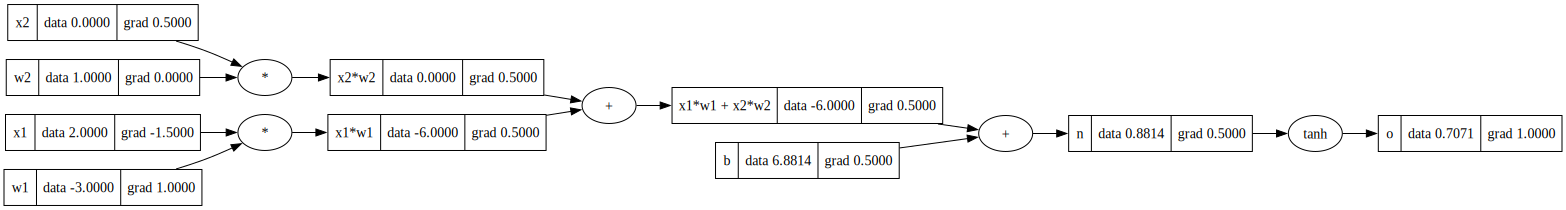

In [104]:
o.backward()
draw_dot_with_grad(o)
